<a href="https://colab.research.google.com/github/macintoxic/BootCampRendaVariavel/blob/main/desafio_1/desafio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DESM1 - Desafio do Módulo 1
## Cria as pastas do projeto e baixa os arquivos do github


In [ ]:
#instala as bibliotecas necessárias.
#no google colab elas já estão instaladas por padrão
#!pip install pandas matplotlib openpyxl mplfinance

In [11]:
#cria as pastas
!mkdir /content/01_Bruto
!mkdir /content/02_Limpo
!mkdir /content/03_Saidas

!wget -O /content/01_Bruto/statusinvest-busca-avancada-fii.csv https://github.com/macintoxic/BootCampRendaVariavel/raw/main/desafio_1/01_Bruto/statusinvest-busca-avancada-fii.csv
!wget -O /content/02_Limpo/statusinvest-busca-avancada-fii.xlsx https://github.com/macintoxic/BootCampRendaVariavel/raw/main/desafio_1/02_Limpo/statusinvest-busca-avancada-fii.xlsx

!wget -O /content/01_Bruto/visc11.csv https://github.com/macintoxic/BootCampRendaVariavel/raw/main/desafio_1/01_Bruto/visc11.csv
!wget -O /content/02_Limpo/visc11.xlsx https://github.com/macintoxic/BootCampRendaVariavel/raw/main/desafio_1/02_Limpo/visc11.xlsx

#!wget -O /content/02_Limpo/statusinvest-busca-avancada2.xlsx https://github.com/macintoxic/BootCampRendaVariavel/raw/main/trabalho_pratico1/02_Limpo/statusinvest-busca-avancada2.xlsx

mkdir: cannot create directory ‘/content/01_Bruto’: File exists
mkdir: cannot create directory ‘/content/02_Limpo’: File exists
mkdir: cannot create directory ‘/content/03_Saidas’: File exists
--2023-03-20 20:43:42--  https://github.com/macintoxic/BootCampRendaVariavel/raw/main/desafio_1/01_Bruto/statusinvest-busca-avancada-fii.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/macintoxic/BootCampRendaVariavel/main/desafio_1/01_Bruto/statusinvest-busca-avancada-fii.csv [following]
--2023-03-20 20:43:42--  https://raw.githubusercontent.com/macintoxic/BootCampRendaVariavel/main/desafio_1/01_Bruto/statusinvest-busca-avancada-fii.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.1

## Faça uma análise exploratório desta base de dados dos FIIs.

In [148]:
import pandas as pd
import matplotlib.pyplot as plt


visc11 = pd.read_excel("/content/02_Limpo/visc11.xlsx")
visc11.head()





Date   Price    Open    High     Low    Vol.  Change %
0  2023-10-03 00:00:00  103.50  104.70  106.80  103.50  41.15K   -0.0114
1  2023-09-03 00:00:00  104.69  105.04  105.44  104.60  16.35K   -0.0033
2  2023-08-03 00:00:00  105.04  105.00  105.90  105.00  18.17K    0.0004
3  2023-07-03 00:00:00  105.00  104.96  105.50  104.57  26.25K    0.0004
4  2023-06-03 00:00:00  104.96  104.48  105.47  104.01  20.52K    0.0046

In [13]:
fiis =  pd.read_excel("/content/02_Limpo/statusinvest-busca-avancada-fii.xlsx")
fiis.head()

TICKER  PRECO  ULTIMO DIVIDENDO     DY  VALOR PATRIMONIAL COTA  P/VP  \
0  CJFI11   0.00              0.00   0.00                    2.60  0.00   
1  RBVA11  90.67              0.95  13.18                  106.57  0.86   
2  QAMI11  78.34              0.95  15.68                   91.99  0.85   
3  CPTS11  75.73              0.76  14.47                   87.72  0.86   
4  PABY11  13.14              0.00   0.00                  -16.53  0.00   

   LIQUIDEZ MEDIA DIARIA  PERCENTUAL EM CAIXA  CAGR DIVIDENDOS 3 ANOS  \
0                   0.00                 1.21                    0.00   
1              893175.85                 0.77                    4.89   
2               21992.53                 4.06                    0.00   
3             5554568.32                 4.88                    3.59   
4                2922.15                 0.00                    0.00   

    CAGR VALOR CORA 3 ANOS    PATRIMONIO  N COTISTAS   GESTAO   N COTAS  
0                     0.00  1.369559e+08           1    Ativa  52601278  
1                    -5.95  1.234967e+09       45948    Ativa  11588199  
2                     0.00  7.371748e+07        1487    Ativa    801398  
3                    -4.51  2.788111e+09      211167    Ativa  31782814  
4                     2.65 -1.253695e+07         698  Passiva    758400

## Crie um gráfico de dispersão com o nome dos ativos no eixo X e os preços no eixo Y no tamanho 12 x 8.


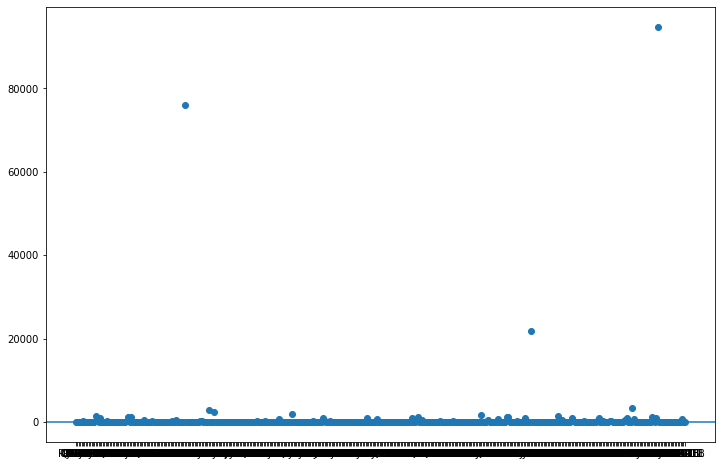

In [31]:
fig = plt.figure(figsize=(12,8))

plt.scatter(fiis['TICKER'], fiis['PRECO'])



## Calcule o percentil de 95 dos dados.

In [38]:
percentil = fiis['PRECO'].quantile(0.95)
percentil

998.45

## Crie uma reta no gráfico com o valor encontrado cortando o eixo Y

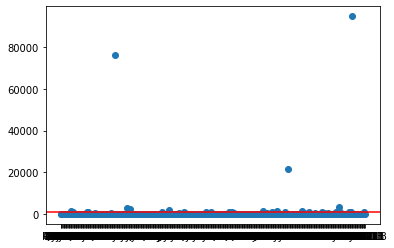

In [45]:

plt.scatter(fiis['TICKER'], fiis['PRECO'])
plt.axhline( percentil,color='r' )
plt.show()


## Exclua os preços igual a zero e exclua os valores acima do percentil calculado anteriormente.

In [60]:
new_fiis = fiis[(fiis['PRECO'] > 0) & (fiis['PRECO'] < percentil)]

## Salve esse dataframe em um novo Excel.

In [63]:
new_fiis.to_excel('/content/02_Limpo/new-fii.xlsx')

## Refaça o gráfico de dispersão com o novo Excel.

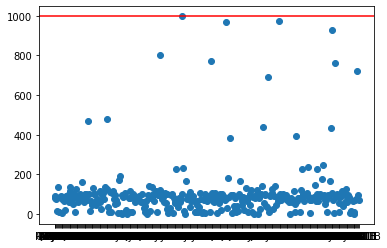

In [64]:
plt.scatter(new_fiis['TICKER'], new_fiis['PRECO'])
plt.axhline( percentil,color='r' )
plt.show()


## Como ainda existem valores muito altos, limite o eixo Y com valores de 0 até R$ 200,00 e crie novamente o gráfico

(0.0, 200.0)

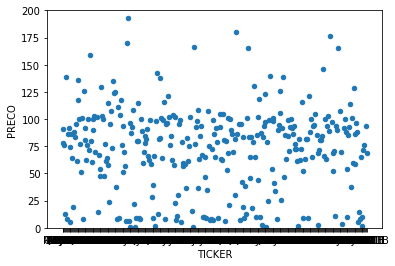

In [102]:
ax = new_fiis.plot.scatter(x='TICKER', y='PRECO')
ax.axhline(percentil,color='r')
ax.set_ylim(top=200,bottom=0)


## Agora crie um gráfico de dispersão com os valores de P/VP

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


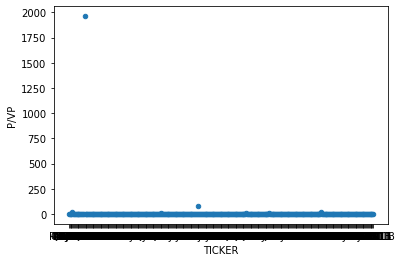

In [100]:

ax = new_fiis.plot.scatter(x='TICKER', y='P/VP')


## Exclua os valores menores que o percentil 5 e os maiores que o percentil 95

In [110]:
q5 = new_fiis['P/VP'].quantile(0.05)
q95 = new_fiis['P/VP'].quantile(0.95)

## Crie um gráfico com os valores mantidos no passo anterior e trace uma linha no eixo Y com o valor igual a 1 (P/VP = 1 Valor Justo de um FII).

In [116]:
filtered_fii=fiis[(fiis['P/VP'] > q5) & (fiis['P/VP'] < q95)]
filtered_fii.head()

TICKER  PRECO  ULTIMO DIVIDENDO     DY  VALOR PATRIMONIAL COTA  P/VP  \
1  RBVA11  90.67              0.95  13.18                  106.57  0.86   
2  QAMI11  78.34              0.95  15.68                   91.99  0.85   
3  CPTS11  75.73              0.76  14.47                   87.72  0.86   
6  APTO11   8.38              0.10  15.53                    9.97  0.84   
7  KIVO11  86.50              1.20  18.80                   96.46  0.87   

   LIQUIDEZ MEDIA DIARIA  PERCENTUAL EM CAIXA  CAGR DIVIDENDOS 3 ANOS  \
1              893175.85                 0.77                    4.89   
2               21992.53                 4.06                    0.00   
3             5554568.32                 4.88                    3.59   
6               80298.15                13.96                    0.00   
7              165597.56                15.43                    0.00   

    CAGR VALOR CORA 3 ANOS    PATRIMONIO  N COTISTAS GESTAO   N COTAS  
1                    -5.95  1.234967e+09       45948  Ativa  11588199  
2                     0.00  7.371748e+07        1487  Ativa    801398  
3                    -4.51  2.788111e+09      211167  Ativa  31782814  
6                     0.00  4.001655e+07        6030  Ativa   4012857  
7                     0.00  1.172066e+08        1485  Ativa   1215124

## Crie um gráfico com os valores mantidos no passo anterior e trace uma linha no eixo Y com o valor igual a 1 (P/VP = 1 Valor Justo de um FII)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


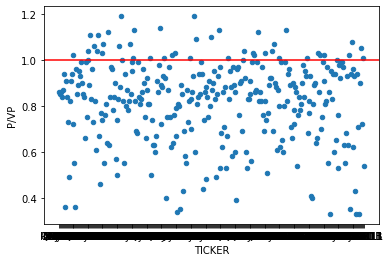

In [119]:
ax =  filtered_fii.plot.scatter(x='TICKER', y='P/VP')
ax.axhline(1, color='r')




## .Reflita sobre este gráfico: Estamos em um bom momento para adquirir ou indicar FIIs?


## Agora vamos trabalhar com médias móveis e análise técnica em cima de um dos FIIs (VISC11 – Fundo Imobiliário de Shopping).

## Crie um gráfico com a base de dados baixada do site investing.com (cotação de preço de VISC11) e inclua neste gráfico as médias móveis dos seguintes períodos (MA14, MA60 e MA120).

<Axes: xlabel='Date'>

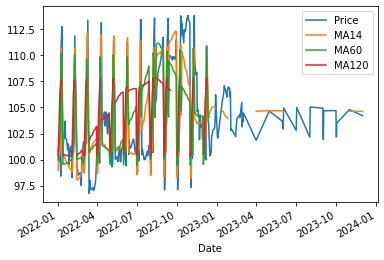

In [168]:
import mplfinance as fplt

visc11['MA14'] = visc11['Price'].rolling(30).mean()
visc11['MA60'] = visc11['Price'].rolling(60).mean()
visc11['MA120'] = visc11['Price'].rolling(120).mean()

tmp =  visc11[['Date','Price','MA14', 'MA60', 'MA120']]
tmp.plot.line()



## Reflita sobre este gráfico: Está fácil de estimar a tendência deste ativo?

## Agora vamos trabalhar com o salvamento do gráfico anterior em formato PDF e salvar este arquivo em um Bucket do GCP (Google  Cloud Plataform)